# 문제 1. 최댓값과 최솟값





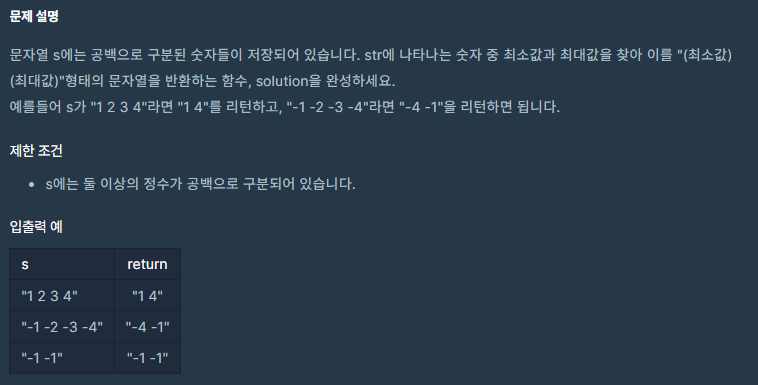

In [26]:
import time

start = time.time()

def solution(s):
# 답안 작성 부분 ===============
    a = list(map(int,s.split(' ')))



# ==============================
    return str(min(a)) + ' ' + str(max(a))

end = time.time()

print(solution("1 2 3 4"))
print(solution("-1 -2 -3 -4"))
print(solution("1 1"))

print("작동시간:", f"{end - start:.5f} sec")

TypeError: 'list' object is not callable

# 문제 2. 올바른 괄호




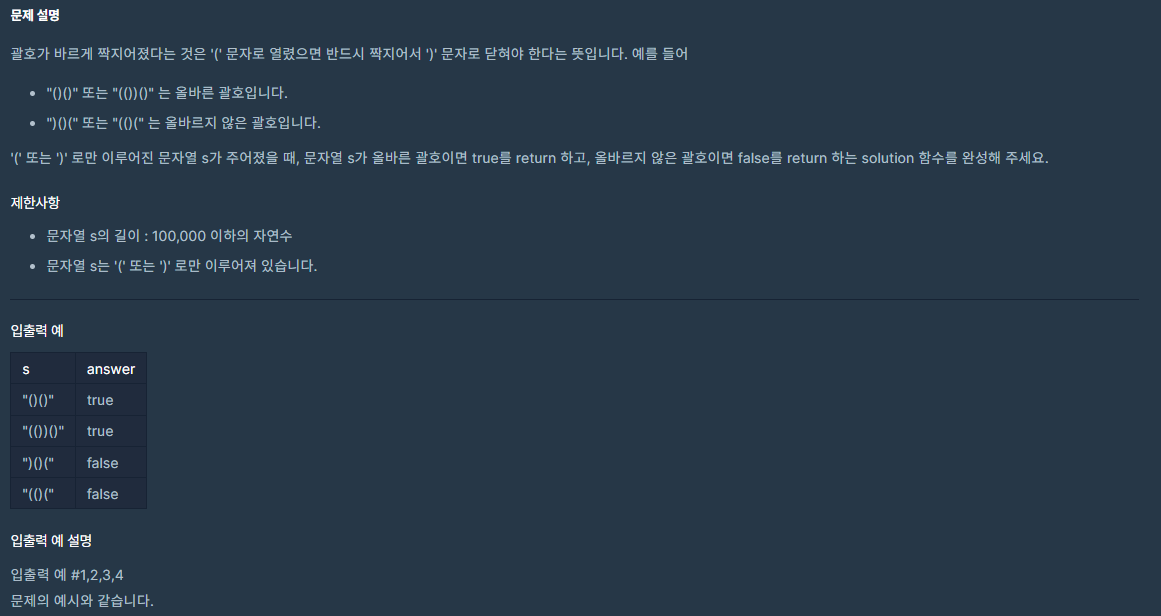

In [ ]:
import time

start = time.time()

def solution(s):
# 답안 작성 부분 ===============



# ==============================
    return answer

end = time.time()

print(solution("()()"))
print(solution("(())()"	))
print(solution(")()("	))
print(solution("(()("	))

print("작동시간:", f"{end - start:.5f} sec")

# 문제 3. 이상한 문자 만들기





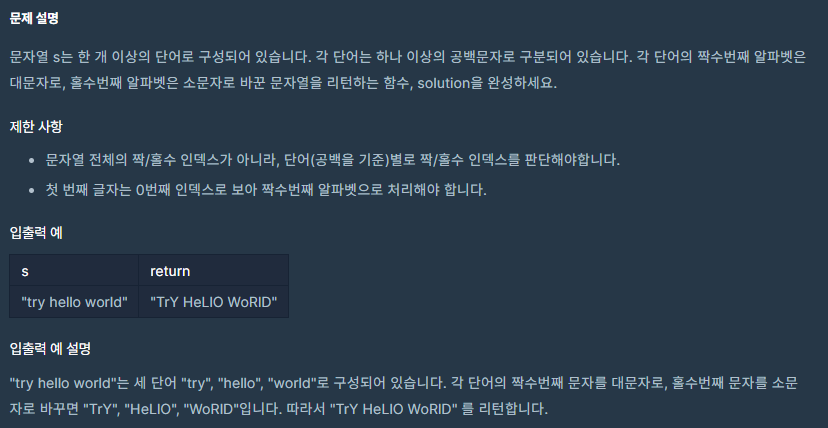

In [ ]:
import time

start = time.time()

def solution(s):
# 답안 작성 부분 ===============
        





# ==============================
    return answer

end = time.time()

print(solution(["try hello world"	]))

print("작동시간:", f"{end - start:.5f} sec")

In [8]:
s = 'try hello world'
list = []
for i in s:
    list.append(i)
print(list)

['t', 'r', 'y', ' ', 'h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']


# 문제 4. 옹알이 (2)




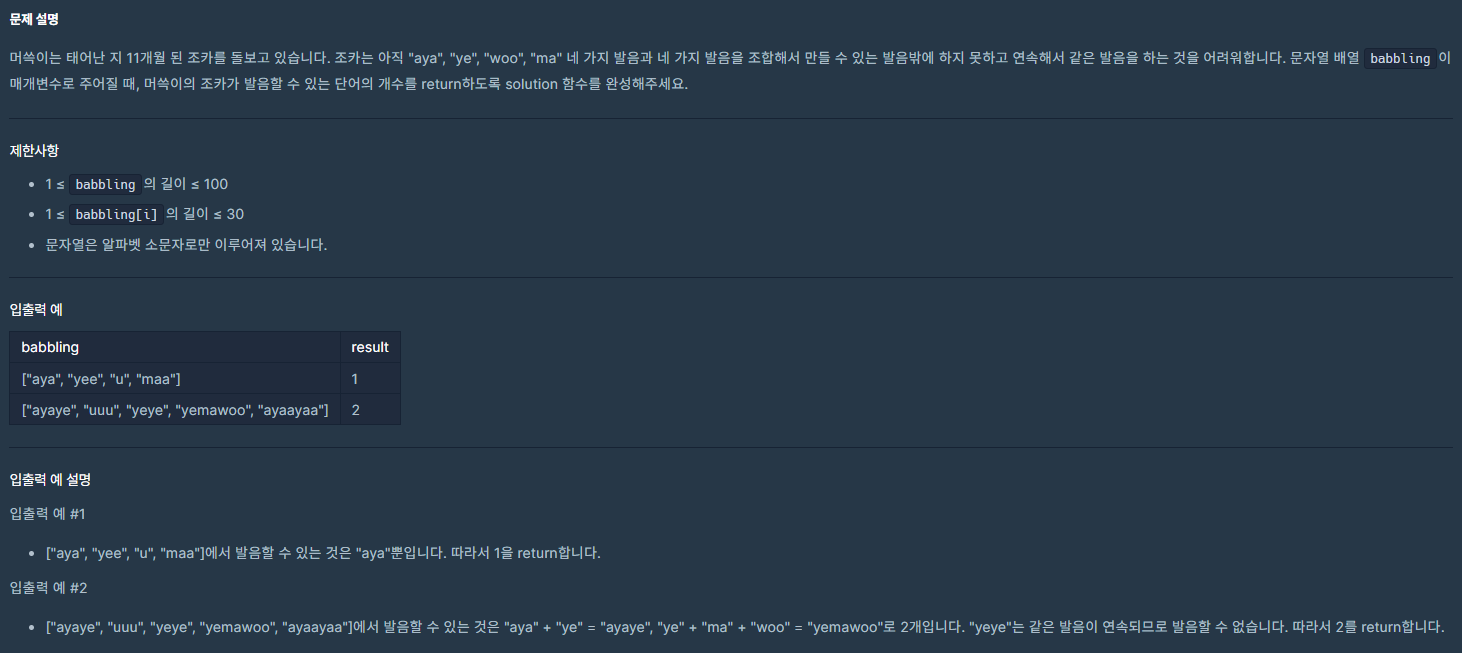

In [ ]:
import time

start = time.time()

def solution(babbling):
# 답안 작성 부분 ===============
    list = ["aya","ye","woo","ma"]
    a = []
    for i in list:
        for j in list:
            a.append()





# ==============================
    return answer

end = time.time()

print(solution(["aya", "yee", "u", "maa"]))
print(solution(["ayaye", "uuu", "yeye", "yemawoo", "ayaayaa"]))

print("작동시간:", f"{end - start:.5f} sec")

# 문제 5. 재미있는 멀티모달(modality) 모델 Study

#### 아래 CustomModel을 보면, image데이터와 text를 둘다 입력으로 받아 처리한 후 concatenate 하여 최종 분류기에 넣어 클래스를 예측(분류)하는 코드이다. 서로 다른 데이터를 인풋으로 받는 모델, 우린 이걸 멀티모달 모델이라고 한다.


#### **문제 설명**:

#### chatGPT, 검색, 오픈북 허용, "# 여기 주석" 이라고 써져있는 곳에 주석을 작성하시오.

#### 주의!) 아래 코드는 안돌아가는 코드. 모델 클래스와 학습 코드만 있을 뿐. 코드를 돌리거나, 완성할 필요가 없다

In [ ]:
import torch.nn as nn

class CustomModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomModel, self).__init__()

        # Image
        self.cnn_extract = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=4, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Text
        self.nlp_extract = nn.Sequential(
            nn.Linear(4096, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
        )
        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(4160, num_classes)
        )

    def forward(self, img, text): # 순전파
        img_feature = self.cnn_extract(img) # 이미지 특징 추출
        img_feature = torch.flatten(img_feature, start_dim=1) # 일자로 쭉 핀다
        text_feature = self.nlp_extract(text) # 텍스트 특징 추출
        feature = torch.cat([img_feature, text_feature], axis=1) # 이미지 특징과 텍스트 특징을 합치는데 둘다 일자로 쭉 펴진 상태이므로 열 방향으로 합친다
        output = self.classifier(feature) # 최종 분류
        return output

In [ ]:
model = CustomModel(num_classes=10)
model.to(device)
criterion = nn.CrossEntropyLoss().to(device)

epochs = 20
for epoch in range(1, epochs):
    model.train()
    for img, text, label in tqdm(iter(train_loader)): # train 데이터에서 img,text,label을 불러온다
        img = img.float().to(device)
        text = text.to(device)
        label = label.to(device)

        optimizer.zero_grad()

        model_pred = model(img, text) # 모델 예측

        loss = criterion(model_pred, label)

        loss.backward()
        optimizer.step()